In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import os
from subprocess import check_output

In [4]:
data_file = pd.read_csv("USvideos.csv")

In [5]:
data_file.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
print(data_file.shape)
print(data_file.nunique())

(40949, 16)
video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [7]:
#Looking for Nulls and type of our data
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


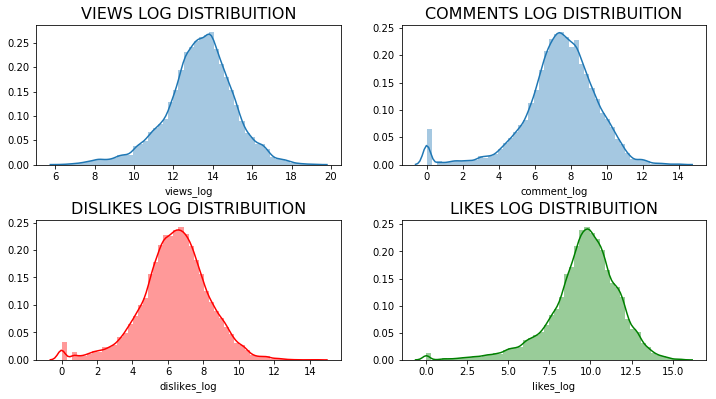

In [13]:
#Views, likes, dislikes and comment counts distrbution curve
data_file['likes_log'] = np.log(data_file['likes'] + 1)
data_file['views_log'] = np.log(data_file['views'] + 1)
data_file['dislikes_log'] = np.log(data_file['dislikes'] + 1)
data_file['comment_log'] = np.log(data_file['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(data_file['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(data_file['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(data_file['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(data_file['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [15]:
print("Views quantiles")
print(data_file['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(data_file['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(data_file['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(data_file['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64

Likes quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64


In [16]:
#Views, likes, dislikes distribuition by category_name's

In [19]:
data_file['category_name'] = np.nan

data_file.loc[(data_file["category_id"] == 1),"category_name"] = 'Film and Animation'
data_file.loc[(data_file["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
data_file.loc[(data_file["category_id"] == 10),"category_name"] = 'Music'
data_file.loc[(data_file["category_id"] == 15),"category_name"] = 'Pets and Animals'
data_file.loc[(data_file["category_id"] == 17),"category_name"] = 'Sport'
data_file.loc[(data_file["category_id"] == 19),"category_name"] = 'Travel and Events'
data_file.loc[(data_file["category_id"] == 20),"category_name"] = 'Gaming'
data_file.loc[(data_file["category_id"] == 22),"category_name"] = 'People and Blogs'
data_file.loc[(data_file["category_id"] == 23),"category_name"] = 'Comedy'
data_file.loc[(data_file["category_id"] == 24),"category_name"] = 'Entertainment'
data_file.loc[(data_file["category_id"] == 25),"category_name"] = 'News and Politics'
data_file.loc[(data_file["category_id"] == 26),"category_name"] = 'How to and Style'
data_file.loc[(data_file["category_id"] == 27),"category_name"] = 'Education'
data_file.loc[(data_file["category_id"] == 28),"category_name"] = 'Science and Technology'
data_file.loc[(data_file["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
data_file.loc[(data_file["category_id"] == 25),"category_name"] = 'News & Politics'

Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


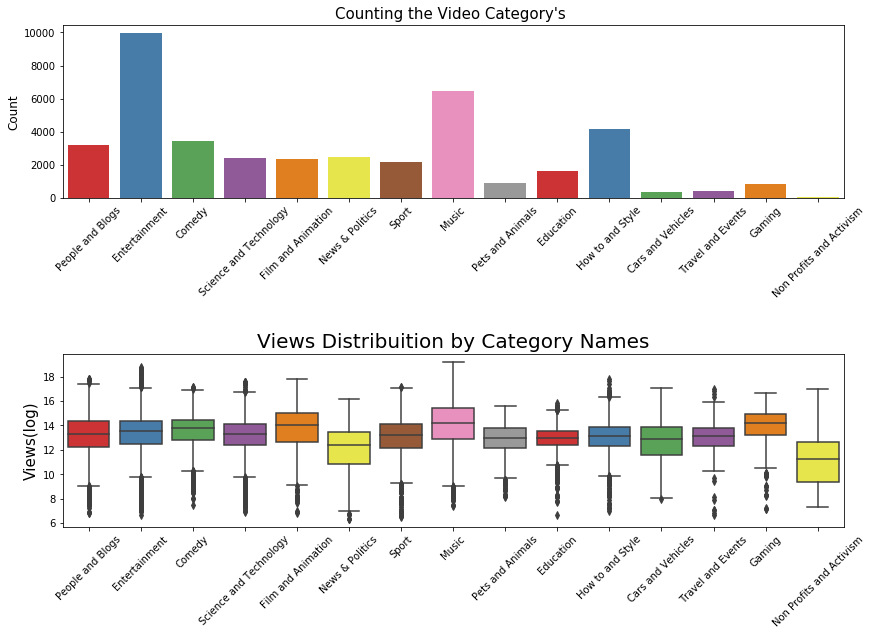

In [20]:
print("Category Name count")
print(data_file.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=data_file, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=data_file, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

Significant number of politics and news videos.

The unique difference is in Non Profits and Activism videos that have less views than the "normal" videos

**Individual attributes distribution by category names **

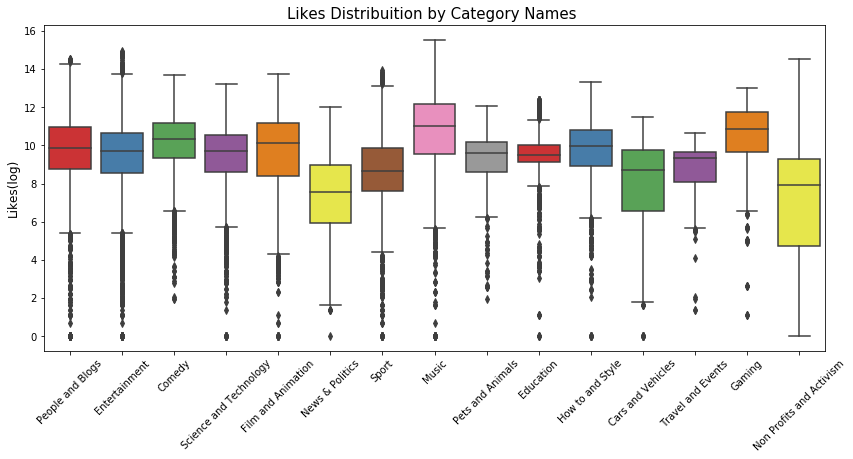

In [21]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=data_file, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

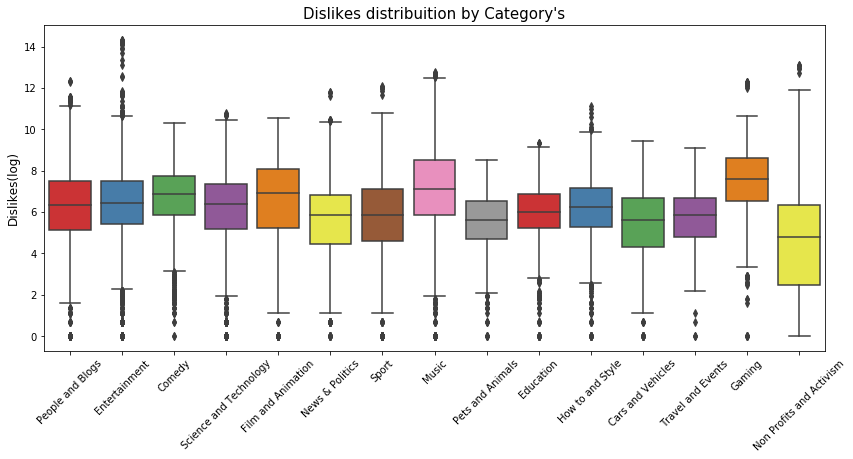

In [22]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=data_file, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

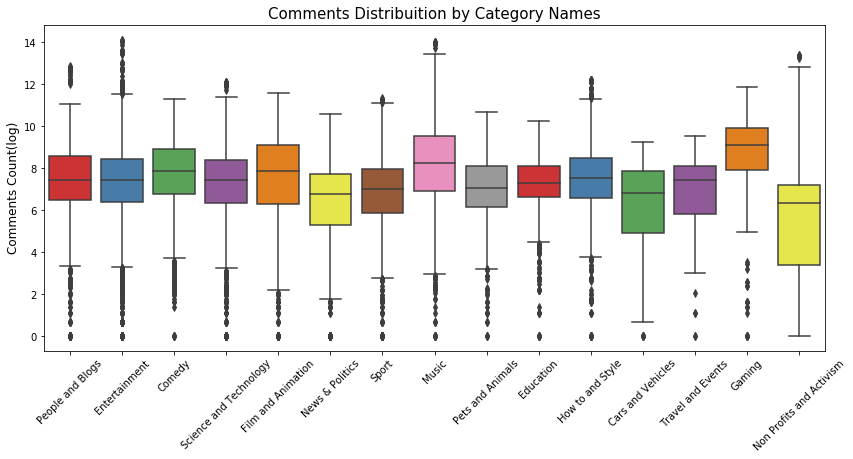

In [23]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=data_file, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

**The correlation of title and tags values with views**

In [27]:
data_file['like_rate'] =  data_file ['likes'] / data_file['views'] * 100
data_file['dislike_rate'] =  data_file ['dislikes'] / data_file['views'] * 100
data_file['comment_rate'] =  data_file ['comment_count'] / data_file['views'] * 100

**convert rate distribution helps the relation of views with likes, dislikes, comments!

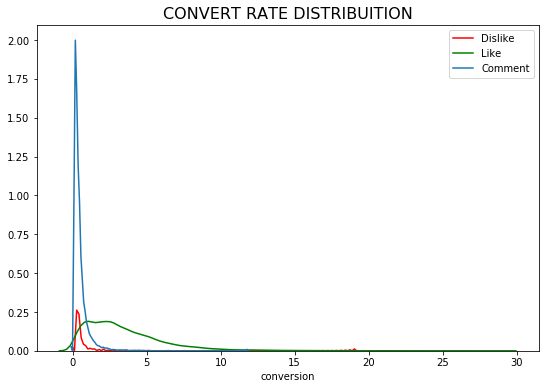

In [30]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(data_file['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(data_file['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(data_file['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.xlabel('conversion')
plt.legend()
plt.show()

Likes and dislikes have interesting differences.
1.conversion rate of likes distributive which reflects true positives 

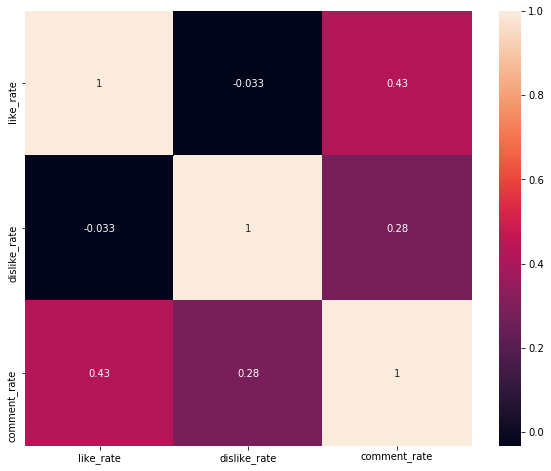

In [32]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(data_file[['like_rate', 'dislike_rate', 'comment_rate', "category_name"]].corr(), annot=True)
plt.show()